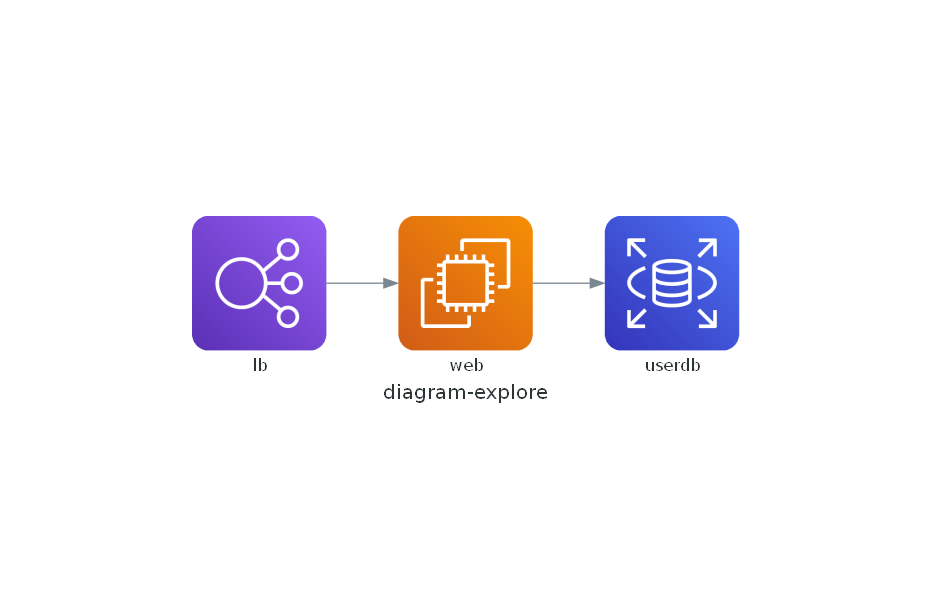

In [73]:
from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB

with Diagram("diagram-explore", show=False):
    ELB("lb") >> EC2("web") >> RDS("userdb")

# Open the diagram in notebook
from IPython.display import Image
Image(filename='diagram-explore.png')

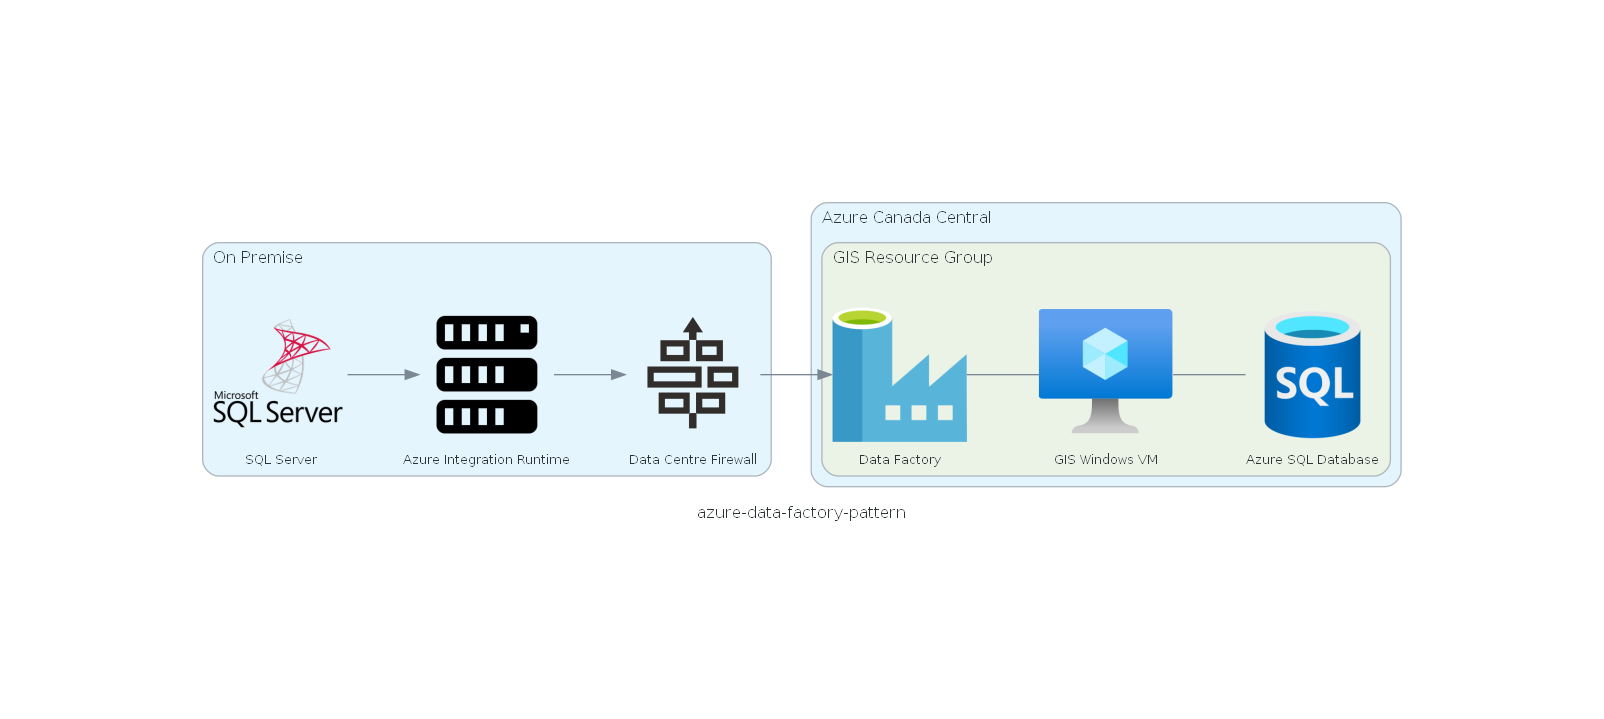

In [75]:
from platform import node
from diagrams import Cluster, Diagram
from diagrams.azure.analytics import DataFactories
from diagrams.azure.compute import VM
from diagrams.azure.database import SQLDatabases
from diagrams.onprem.database import Mssql
from diagrams.onprem.compute import Server
from diagrams.oci.network import Firewall

# Attributes at https://www.graphviz.org/docs/graph/
graph_attr = {
    "fontsize": "12",
    "bgcolor": "white"
}

# Attributes at https://graphviz.org/docs/nodes/
node_attr = {
  "fontsize": "10"
}

# Attributes at https://graphviz.org/docs/edges/
edge_attr = {
}

with Diagram("azure-data-factory-pattern", show=False, graph_attr=graph_attr, node_attr=node_attr):
  with Cluster("On Premise"):
    mssql_op = Mssql("SQL Server")
    integration_runtime = Server("Azure Integration Runtime")
    dc_firewall = Firewall("Data Centre Firewall")
  
  mssql_op >> integration_runtime >> dc_firewall
  
  with Cluster("Azure Canada Central"):
    with Cluster("GIS Resource Group"):
      adf = DataFactories("Data Factory") 
      vm_gis = VM("GIS Windows VM")
      asql = SQLDatabases("Azure SQL Database")
      dc_firewall >> adf
      adf - vm_gis - asql

from IPython.display import Image
Image(filename='azure-data-factory-pattern.png')    
